In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import os
import random
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle
from keras.utils import normalize
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D
from keras.layers import Activation , Dropout , Flatten , Dense

In [2]:
directory='dataset/'
f=['Not_Tree_Images' , 'Tree_Images']

In [3]:
data=[]
for i in f:
    folder=os.path.join(directory , i)
    ans=f.index(i)
    for image in os.listdir(folder):
        image_path=os.path.join(folder , image)
        dataset=cv2.imread(image_path)
        dataset=cv2.resize(dataset,(150,150))
        data.append([dataset,ans])
        
   

In [4]:
random.shuffle(data);

In [5]:
dataset=[]
labels=[]
for x , y in data:
    dataset.append(x)
    labels.append(y)

In [6]:
dataset=np.array(dataset)
labels=np.array(labels)


In [7]:
dataset=dataset/255


In [8]:
traindata ,testdata , trainlabel  , testlabel = train_test_split( dataset , labels , test_size=0.2 , random_state=0)

In [9]:
traindata=normalize(traindata , axis=1 )
testdata=normalize(testdata , axis=1)


# model 1 


In [13]:
model=Sequential()
model.add(Conv2D(32 , (3,3),input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32 , (3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(150 , (3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [16]:
model.fit(traindata , trainlabel , batch_size=16 , verbose=1 , epochs=10 ,  shuffle=False)

Epoch 1/10
50/50 [==============================] - 11s 224ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 2/10
50/50 [==============================] - 11s 217ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 3/10
50/50 [==============================] - 11s 217ms/step - loss: 0.0211 - accuracy: 0.9912
Epoch 4/10
50/50 [==============================] - 11s 218ms/step - loss: 0.0048 - accuracy: 0.9987
Epoch 5/10
50/50 [==============================] - 11s 218ms/step - loss: 0.0039 - accuracy: 0.9987
Epoch 6/10
50/50 [==============================] - 11s 223ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 11s 221ms/step - loss: 8.5535e-04 - accuracy: 1.0000
Epoch 8/10
50/50 [==============================] - 11s 223ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/10
50/50 [==============================] - 11s 224ms/step - loss: 0.0036 - accuracy: 0.9987
Epoch 10/10
50/50 [==============================] - 11s 218ms/step - loss: 0.0161 - ac

In [20]:
model.evaluate(testdata,testlabel)

7/7 [==============================] - 1s 82ms/step - loss: 0.1345 - accuracy: 0.9700


[0.1344756782054901, 0.9700000286102295]

1/1 [==============================] - 0s 16ms/step
0


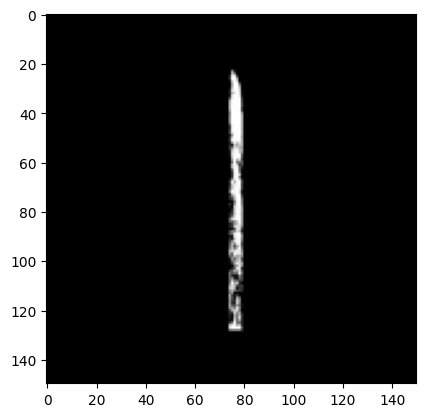

In [44]:
image=cv2.imread('C:\\Users\\vkhat\\Desktop\\AI hackathon ML\\dataset\\Not_Tree_Images\\HAR_AJ_534.png')
#image=cv2.imread('C:\\Users\\vkhat\\Desktop\\AI hackathon ML\\dataset\\Tree_Images\\FJI_AP_807.png')
img=Image.fromarray(image)
img=img.resize((150,150))
plt.imshow(img)
img=np.array(img)
i_img=np.expand_dims(img,axis=0)
result=model.predict(i_img)
classes_x=np.argmax(result,axis=1)
print(int(result))